In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [7]:
cities

['hithadhoo',
 'illoqqortoormiut',
 'itoman',
 'hermanus',
 'esperance',
 'xining',
 'kirakira',
 'butaritari',
 'souillac',
 'bambanglipuro',
 'barentsburg',
 'hualmay',
 'vaini',
 'bluff',
 'diamantina',
 'vardo',
 'castlemaine',
 'yellowknife',
 'avarua',
 'mataura',
 'jamestown',
 'viligili',
 'ambilobe',
 'san cristobal',
 'bengkulu',
 'busselton',
 'albany',
 'bathsheba',
 'sestri levante',
 'yialos',
 'kaitangata',
 'orahovac',
 'acapulco',
 'nikolskoye',
 'port hardy',
 'new norfolk',
 'ribeira grande',
 'ushuaia',
 'havoysund',
 'kapaa',
 'klaksvik',
 'rikitea',
 'amahai',
 'punta arenas',
 'meyungs',
 'taolanaro',
 'batticaloa',
 'port-gentil',
 'pangnirtung',
 'tomatlan',
 'dikson',
 'port elizabeth',
 'capitao poco',
 'abu zabad',
 'udalguri',
 'tuktoyaktuk',
 'hobyo',
 'tiksi',
 'gualaquiza',
 'touho',
 'bundaberg',
 'saint-philippe',
 'longonjo',
 'east london',
 'ostrovnoy',
 'nalut',
 'arlit',
 'moindou',
 'georgetown',
 'khatanga',
 'big rapids',
 'howard springs',
 't

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71e5082318a0cb6f1877908fbd45d943


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 25.7,
  'feels_like': 16.03,
  'temp_min': 21.99,
  'temp_max': 30.99,
  'pressure': 1031,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 310},
 'clouds': {'all': 20},
 'dt': 1604146277,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1604143010,
  'sunset': 1604180322},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Get the JSON data.
boston_data = city_weather.json()

In [25]:
boston_data['weather'][0]['description']

'few clouds'

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 32 92 90 17.22


In [ ]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [39]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | hobyo
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | iralaya
Processing Record 5 of Set 1 | taoudenni
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | hot springs
Processing Record 9 of Set 1 | kingaroy
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | sinnamary
Processing Record 13 of Set 1 | polson
Processing Record 14 of Set 1 | los llanos de aridane
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | ozark
Processing Record 18 of Set 1 | chatham
Processing Record 19 of Set 1 | sao felix do xingu
Processing Record 20 of Set 1 | yar-sale
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | chuy
Processing

City not found. Skipping...
Processing Record 44 of Set 4 | kavieng
Processing Record 45 of Set 4 | flinders
Processing Record 46 of Set 4 | pangnirtung
Processing Record 47 of Set 4 | te anau
Processing Record 48 of Set 4 | plouzane
Processing Record 49 of Set 4 | atuona
Processing Record 50 of Set 4 | ruteng
Processing Record 1 of Set 5 | calama
Processing Record 2 of Set 5 | sussex
Processing Record 3 of Set 5 | uyo
Processing Record 4 of Set 5 | victor harbor
Processing Record 5 of Set 5 | eureka
Processing Record 6 of Set 5 | lolua
City not found. Skipping...
Processing Record 7 of Set 5 | toliary
City not found. Skipping...
Processing Record 8 of Set 5 | hofn
Processing Record 9 of Set 5 | bontang
Processing Record 10 of Set 5 | dosso
Processing Record 11 of Set 5 | milingimbi
City not found. Skipping...
Processing Record 12 of Set 5 | shubarkuduk
Processing Record 13 of Set 5 | samarai
Processing Record 14 of Set 5 | upernavik
Processing Record 15 of Set 5 | milkovo
Processing R

Processing Record 29 of Set 8 | twin falls
Processing Record 30 of Set 8 | san juan
Processing Record 31 of Set 8 | barmer
Processing Record 32 of Set 8 | inuvik
Processing Record 33 of Set 8 | karamea
City not found. Skipping...
Processing Record 34 of Set 8 | stokmarknes
Processing Record 35 of Set 8 | kangaatsiaq
Processing Record 36 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 37 of Set 8 | kosjeric
Processing Record 38 of Set 8 | ushtobe
Processing Record 39 of Set 8 | sao miguel
Processing Record 40 of Set 8 | jalu
Processing Record 41 of Set 8 | vardo
Processing Record 42 of Set 8 | saint anthony
Processing Record 43 of Set 8 | barra do garcas
Processing Record 44 of Set 8 | goundam
Processing Record 45 of Set 8 | cardston
Processing Record 46 of Set 8 | abonnema
Processing Record 47 of Set 8 | mayo
Processing Record 48 of Set 8 | san quintin
Processing Record 49 of Set 8 | usinsk
Processing Record 50 of Set 8 | zhezkazgan
Processing Record 1 of Set 9 | ikor

Processing Record 17 of Set 12 | deer lake
Processing Record 18 of Set 12 | murgab
Processing Record 19 of Set 12 | byron bay
Processing Record 20 of Set 12 | gazalkent
Processing Record 21 of Set 12 | ziro
Processing Record 22 of Set 12 | gidole
Processing Record 23 of Set 12 | herrin
Processing Record 24 of Set 12 | acapulco
Processing Record 25 of Set 12 | nishihara
Processing Record 26 of Set 12 | flin flon
Processing Record 27 of Set 12 | mauganj
Processing Record 28 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 29 of Set 12 | arak
Processing Record 30 of Set 12 | massaguet
Processing Record 31 of Set 12 | wanning
Processing Record 32 of Set 12 | manaus
Processing Record 33 of Set 12 | klyuchi
Processing Record 34 of Set 12 | beyneu
Processing Record 35 of Set 12 | marsabit
Processing Record 36 of Set 12 | marsh harbour
Processing Record 37 of Set 12 | sioux lookout
Processing Record 38 of Set 12 | brae
Processing Record 39 of Set 12 | takoradi
Processing R

In [40]:
len(city_data)

579

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobyo,5.35,48.53,81.88,74,4,11.70,SO,2020-10-30 16:20:31
1,Ushuaia,-54.80,-68.30,48.20,76,75,29.97,AR,2020-10-30 16:19:04
2,Iralaya,15.00,-83.23,84.94,71,100,7.34,HN,2020-10-30 16:20:31
3,Taoudenni,22.68,-3.98,91.74,11,100,11.10,ML,2020-10-30 16:20:28
4,Luderitz,-26.65,15.16,68.02,43,59,33.42,NA,2020-10-30 16:20:31
5,Hilo,19.73,-155.09,75.20,88,90,3.36,US,2020-10-30 16:20:31
6,Hot Springs,34.50,-93.06,53.60,54,1,6.93,US,2020-10-30 16:20:31
7,Kingaroy,-26.53,151.83,66.20,88,0,6.93,AU,2020-10-30 16:20:31
8,Bredasdorp,-34.53,20.04,62.60,45,0,10.29,ZA,2020-10-30 16:20:31
9,Hobart,-42.88,147.33,46.40,87,12,5.82,AU,2020-10-30 16:16:53


In [42]:
new_columns= ["City","Country","Date","Lat","Lng","Max Temp","Humidity", "Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_columns]

In [43]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobyo,SO,2020-10-30 16:20:31,5.35,48.53,81.88,74,4,11.70
1,Ushuaia,AR,2020-10-30 16:19:04,-54.80,-68.30,48.20,76,75,29.97
2,Iralaya,HN,2020-10-30 16:20:31,15.00,-83.23,84.94,71,100,7.34
3,Taoudenni,ML,2020-10-30 16:20:28,22.68,-3.98,91.74,11,100,11.10
4,Luderitz,NA,2020-10-30 16:20:31,-26.65,15.16,68.02,43,59,33.42
5,Hilo,US,2020-10-30 16:20:31,19.73,-155.09,75.20,88,90,3.36
6,Hot Springs,US,2020-10-30 16:20:31,34.50,-93.06,53.60,54,1,6.93
7,Kingaroy,AU,2020-10-30 16:20:31,-26.53,151.83,66.20,88,0,6.93
8,Bredasdorp,ZA,2020-10-30 16:20:31,-34.53,20.04,62.60,45,0,10.29
9,Hobart,AU,2020-10-30 16:16:53,-42.88,147.33,46.40,87,12,5.82


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

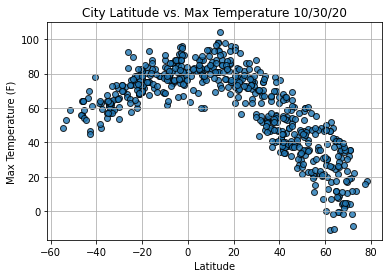

In [46]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

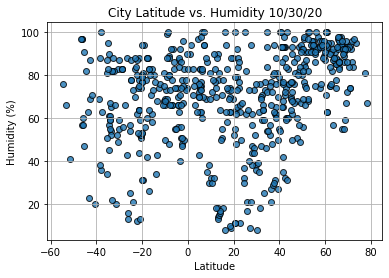

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

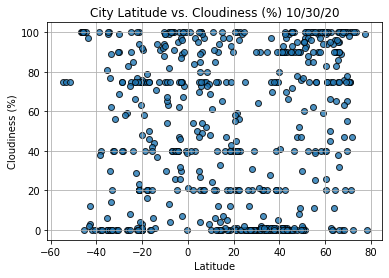

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

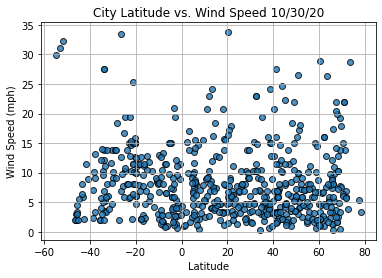

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [50]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [51]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [52]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [53]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

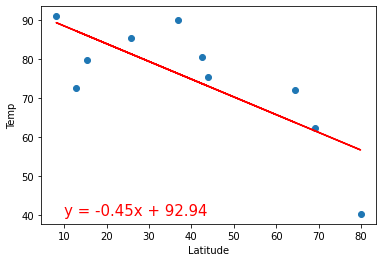

In [54]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [55]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (<ipython-input-55-d58af2435033>, line 3)

In [73]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [74]:
index13 = city_data_df.loc[13]
index13

City                       Barrow
Country                        US
Date          2020-10-30 16:20:31
Lat                         71.29
Lng                       -156.79
Max Temp                     19.4
Humidity                       92
Cloudiness                     20
Wind Speed                  13.87
Name: 13, dtype: object

In [75]:
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [76]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobyo,SO,2020-10-30 16:20:31,5.35,48.53,81.88,74,4,11.70
2,Iralaya,HN,2020-10-30 16:20:31,15.00,-83.23,84.94,71,100,7.34
3,Taoudenni,ML,2020-10-30 16:20:28,22.68,-3.98,91.74,11,100,11.10
5,Hilo,US,2020-10-30 16:20:31,19.73,-155.09,75.20,88,90,3.36
6,Hot Springs,US,2020-10-30 16:20:31,34.50,-93.06,53.60,54,1,6.93


In [77]:
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]

In [78]:
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ushuaia,AR,2020-10-30 16:19:04,-54.80,-68.30,48.20,76,75,29.97
4,Luderitz,NA,2020-10-30 16:20:31,-26.65,15.16,68.02,43,59,33.42
7,Kingaroy,AU,2020-10-30 16:20:31,-26.53,151.83,66.20,88,0,6.93
8,Bredasdorp,ZA,2020-10-30 16:20:31,-34.53,20.04,62.60,45,0,10.29
9,Hobart,AU,2020-10-30 16:16:53,-42.88,147.33,46.40,87,12,5.82
...,...,...,...,...,...,...,...,...,...
557,Paracuru,BR,2020-10-30 16:21:25,-3.41,-39.03,82.00,71,26,21.00
571,Beloha,MG,2020-10-30 16:21:27,-25.17,45.05,73.26,57,0,16.67
572,Tanete,ID,2020-10-30 16:21:27,-3.94,119.78,76.82,84,62,1.59
573,Mananjary,MG,2020-10-30 16:21:27,-21.22,48.33,68.95,75,23,6.46


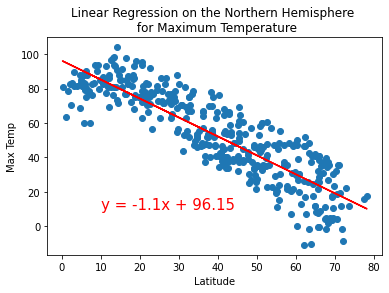

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,10))


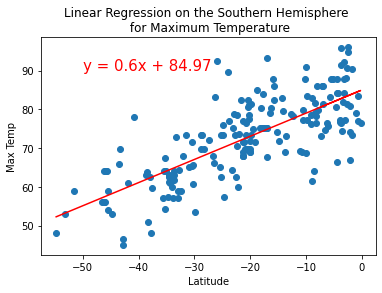

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

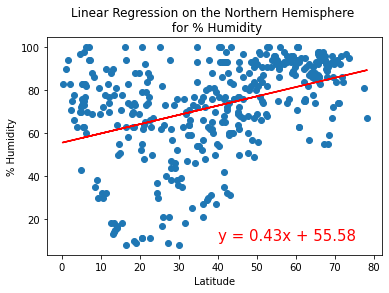

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

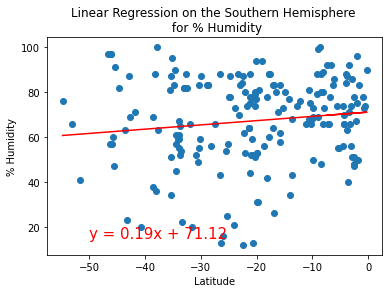

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

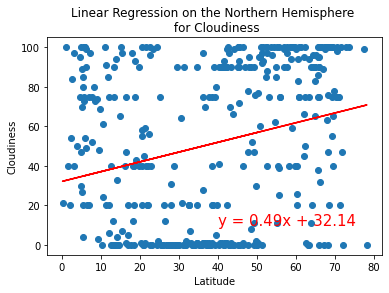

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(40,10))

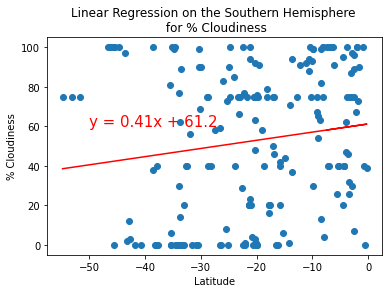

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))